In [1]:
# hotel_id = 57b66e62916bb9001839f1d5 , of casino hotel
# Polynomial Regression model

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import calendar
import pymongo
import urllib.parse
from datetime import date
from pandas import DatetimeIndex
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
import matplotlib.pyplot as plot

In [2]:
def get_booking_data(hotel_id):
    booking_data = df_bookings[df_bookings.hotel_id == hotel_id]
    booking_data = booking_data[booking_data.cancelled == False]
    booking_data = booking_data.groupby(['stay_dt'],as_index=False)[['rooms']].sum()
    booking_data['stay_dt'] = pd.to_datetime(booking_data['stay_dt'])
    return booking_data

In [3]:
def initialize(df):
    df['Jan'] = 0 
    df['Feb'] = 0
    df['Mar'] = 0
    df['Apr'] = 0
    df['May'] = 0
    df['Jun'] = 0
    df['Jul'] = 0
    df['Aug'] = 0
    df['Sep'] = 0
    df['Oct'] = 0
    df['Nov'] = 0
    df['Dec'] = 0
    return df

In [4]:

def format_stay_dt_encode(df):
    df = initialize(df)
    for i in df.index:
        stay_date = df.get_value(i,'stay_dt')
        mm = stay_date.month
        dd = stay_date.day
        yy = stay_date.year
        df.set_value(i,'year',yy)
        df.set_value(i,'day',dd)
        week_day=stay_date.weekday()
        df.set_value(i,'week_day',week_day)
        if(week_day==6 or week_day==5 or week_day==4):
            df.set_value(i,'weekend',1)
        else:
            df.set_value(i,'weekend',0)
            
        if mm == 1:df.set_value(i,'Jan',1)
        elif mm ==2:df.set_value(i,'Feb',1)
        elif mm ==3:df.set_value(i,'Mar',1)
        elif mm ==4:df.set_value(i,'Apr',1)
        elif mm ==5:df.set_value(i,'May',1)
        elif mm ==6:df.set_value(i,'Jun',1)
        elif mm ==7:df.set_value(i,'Jul',1)
        elif mm ==8:df.set_value(i,'Aug',1)
        elif mm ==9:df.set_value(i,'Sep',1)
        elif mm ==10:df.set_value(i,'Oct',1)
        elif mm ==11:df.set_value(i,'Nov',1)
        elif mm ==12:df.set_value(i,'Dec',1)
    df = df[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','week_day','day','weekend','rooms']]
    df = df.groupby(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','week_day','day','weekend'],as_index=False)[['rooms']].mean()
    return df


In [5]:
def format_stay_dt_test_encode(df):
    df = initialize(df)
    for i in df.index:
        stay_date = df.get_value(i,'stay_dt')
        mm = stay_date.month
        dd = stay_date.day
        df.set_value(i,'day',dd)
        week_day=stay_date.weekday()
        df.set_value(i,'week_day',week_day)
        if(week_day==6 or week_day==5 or week_day==4):
            df.set_value(i,'weekend',1)
        else:
            df.set_value(i,'weekend',0)
        
        if mm == 1:df.set_value(i,'Jan',1)
        elif mm ==2:df.set_value(i,'Feb',1)
        elif mm ==3:df.set_value(i,'Mar',1)
        elif mm ==4:df.set_value(i,'Apr',1)
        elif mm ==5:df.set_value(i,'May',1)
        elif mm ==6:df.set_value(i,'Jun',1)
        elif mm ==7:df.set_value(i,'Jul',1)
        elif mm ==8:df.set_value(i,'Aug',1)
        elif mm ==9:df.set_value(i,'Sep',1)
        elif mm ==10:df.set_value(i,'Oct',1)
        elif mm ==11:df.set_value(i,'Nov',1)
        elif mm ==12:df.set_value(i,'Dec',1)
    df = df[['stay_dt','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','week_day','day','weekend','rooms']]
    df = df.groupby(['stay_dt','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','week_day','day','weekend'],as_index=False)[['rooms']].mean()
    return df


In [6]:
def yearly_change_factor(df,month,prev_yr):
    
    for i in df.index:
        stay_date = df.get_value(i,'stay_dt')
        mm = stay_date.month
        yy = stay_date.year
        df.set_value(i,'month',mm)
        df.set_value(i,'year',yy)
    df = df.groupby(['year','month'],as_index = False)[['rooms']].sum()
    df = df[(df.month == month)]
    idx = df.index
    increment = 0
    j=idx[0]
    k=idx[1]
    factor = (df.get_value(j,'rooms'))/(df.get_value(k,'rooms'))
    avg_increment = factor * (df.get_value(j,'rooms'))
    return avg_increment
    

In [7]:
def avg_yearly_change(df,curr_yr):
    prev_yr = curr_yr-1
    for i in df.index:
        stay_date = df.get_value(i,'stay_dt')
        yy = stay_date.year
        df.set_value(i,'year',yy)
    df = df.groupby(['year'],as_index = False)[['rooms']].sum()
    df = df[(df.year <= prev_yr)]
    idx = df.index
    change = 0
    for i in range(0,idx.size-1):
        j = i+1
        k= i
        change = change + (df.get_value(idx[j],'rooms')) - (df.get_value(idx[k],'rooms'))
    avg_change = change/(idx.size)
    return avg_change

In [8]:
df_bookings = pd.read_csv("C:\\Users\\Rakesh\\OneDrive\\Documents\\Data\\booking.csv")

df_hotels = pd.read_csv("C:\\Users\\Rakesh\\OneDrive\\Documents\\Data\\hotel.csv")

C:\Users\Rakesh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (4,5,10,12,15,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Rakesh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (24,3005,3009,3013,3018,3022,3026,3030,3034,3038) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [103]:
# Testing for casino hotel only

hotel_id = '57b66e62916bb9001839f1d5'
booking_data = get_booking_data(hotel_id)

df_train = booking_data[(booking_data.stay_dt < pd.to_datetime('2018-12-01'))]
df_test = booking_data[(booking_data.stay_dt >= pd.to_datetime('2018-12-01')) & (booking_data.stay_dt<pd.to_datetime('2019-01-01'))]


In [104]:
df_booking_data = []
df_booking_data = pd.DataFrame(df_booking_data)

In [105]:
df_booking_data['stay_dt'] = df_train['stay_dt'].values
df_booking_data['rooms'] = df_train['rooms'].values

In [106]:
df_train = format_stay_dt_encode(df_train.loc[:,:].copy())
df_test = format_stay_dt_test_encode(df_test.loc[:,:].copy())

In [107]:
#onehotencoder = OneHotEncoder()
x_train = df_train.iloc[:,0:15].values
y_train = df_train.iloc[:,15].values
onehotencoder0 = OneHotEncoder(categorical_features = [12])
x_train = onehotencoder0.fit_transform(x_train).toarray()

In [108]:
#encoding the test data as well
x_test = df_test.iloc[:,1:16].values
y_test = df_test.iloc[:,16].values
x_test = onehotencoder0.transform(x_test).toarray()

In [109]:
def normalize(df):
    df['avg_prediction'] = 0
    idx = df.index
    
    first = (df.get_value(idx[0],'predict')+df.get_value(idx[1],'predict'))/2
    df.set_value(idx[0],'avg_prediction',first)
    pre= 0 
    cur = df.get_value(idx[0],'predict')
    nxt = df.get_value(idx[1],'predict')
    avg = 0
    for i in range(1,idx.size-1):
        pre=cur
        cur=nxt
        nxt=df.get_value(idx[i+1],'predict')
        avg = (pre+cur+nxt)/3
        df.set_value(idx[i],'avg_prediction',avg)
        
    last = (df.get_value(idx[idx.size-1],'predict')+df.get_value(idx[idx.size-2],'predict'))/2
    df.set_value(idx[idx.size-1],'avg_prediction',last)
    return df

In [110]:
poly = PolynomialFeatures(degree = 2)
x_train_poly = poly.fit_transform(x_train)
lin = LinearRegression()
lin.fit(x_train_poly , y_train)

x_test_poly = poly.transform(x_test)
y_pred = lin.predict(x_test_poly)

test_pred_df = df_test
test_pred_df['predict'] = y_pred

In [111]:
weekday_increment = 0
weekend_increment = 0
total_increment = yearly_change_factor(df_booking_data.iloc[:,:].copy(),12,2017)
weekday_increment = 3 * total_increment / 28 
weekend_increment = 4 * total_increment / 28 


In [112]:
for i in test_pred_df.index:
    prediction = test_pred_df.get_value(i,'predict')
    weekend = test_pred_df.get_value(i,'weekend')
    if(prediction<0):
        prediction = prediction * (-1)
        test_pred_df.set_value(i,'predict',prediction)
    if(weekend == 1):
        test_pred_df.set_value(i,'predict',prediction + weekend_increment )
    else:
        test_pred_df.set_value(i,'predict',prediction + weekday_increment )

In [113]:
test_pred_df = normalize(test_pred_df)

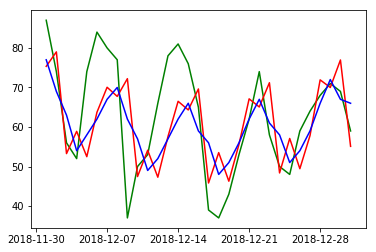

In [114]:
plot.plot_date(test_pred_df['stay_dt'],test_pred_df['rooms'],'green')
# green - Original number of bookings

plot.plot_date(test_pred_df['stay_dt'],test_pred_df['predict'],'red')
#red - Number of bookings predicted

plot.plot_date(test_pred_df['stay_dt'],test_pred_df['avg_prediction'],'blue')
#yellow - Number of bookings predicted
plot.show()


In [115]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(test_pred_df['rooms'], test_pred_df['avg_prediction'])))

10.8983573784


In [116]:
test_pred_df[['stay_dt','rooms','predict','avg_prediction']]

,stay_dt,rooms,predict,avg_prediction
0,2018-12-01,87.0,75.340463,77
1,2018-12-02,74.0,78.996217,69
2,2018-12-03,56.0,53.269115,63
3,2018-12-04,52.0,58.893338,54
4,2018-12-05,74.0,52.485580,58
5,2018-12-06,84.0,63.718371,62
6,2018-12-07,80.0,70.047689,67
7,2018-12-08,77.0,67.737544,70
8,2018-12-09,37.0,72.219488,62
9,2018-12-10,50.0,47.462566,57


In [79]:
# -----Without Normalization ----
#=================================
# 1st degree mse = 12.1676682343 
# 2nd degree mse = 12.161907418
# 3rd degree mse = 14.565
# 4th degree mse = 15.938
# 5th degree mse = 20.222
# 6th degree mse = 62.015

In [80]:
# -----Using Normalization----
#=================================
# 1st degree mse = 12.5
# 2nd degree mse = 10.89
# 3rd degree mse = 12.62
# 4th degree mse = 13.2
# 5th degree mse = 15.07
# 6th degree mse = 40.025